COMP6745 - Machine Learning  
Christopher Angelo - 2440041503

# Final Semester Exam

## Preamble

I will be assuming that the dataset is stored on the same directory that this file is in.
In addition, the file name should be unchanged (`CustomerMarketingDataset.csv`).
In the case of any change, please change the below variable:

In [1]:
dataset_path='./CustomerMarketingDataset.csv'

The following code will import (and install) necessary packages

In [2]:
# Install and import necessary packages
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Question 1

Below is the problem statement:

> Bee Department Store is planning to build a machine learning model to accurately identify
> their customer, so they can provide the best marketing strategy for each customer. They have
> collected some of the customer’s data (https://bit.ly/3b3p1Zf). The data collected consist of
> the customer’s age, gender, whether they own a home (OwnHome), marital status, location
> from the customer’s home to Bee Department Store, salary, number of children, their
> purchase volume history (History), number of catalogs sent (Catalog) and how much they have
> spent at Bee Department Store. As the Machine Learning Engineer, you are required to:

### Answer 1A

> A. **Explain** the dataset profile comprehensively. Use **visualization** to help
>    the explanation

Lets first import our dataset into this notebook and inspect it.

In [3]:
dataset = pd.read_csv(dataset_path)
dataset

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Young,Male,Rent,Single,Close,15000,3,Low,6,Low
1,Young,Male,Rent,Single,Close,13000,3,Low,6,Low
2,Young,Female,Rent,Single,Close,14600,3,Low,6,Low
3,Young,Female,Rent,Single,Close,17900,3,Low,6,Low
4,Old,Female,Own,Single,Close,12700,2,Low,6,Low
...,...,...,...,...,...,...,...,...,...,...
995,Middle,Female,Own,Married,Far,99200,0,High,24,Very High
996,Old,Female,Own,Married,Far,110000,0,High,24,Very High
997,Middle,Female,Rent,Married,Far,120800,1,High,24,Very High
998,Middle,Male,Own,Married,Far,123000,1,High,24,Very High


In [4]:
dataset.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent'],
      dtype='object')

In [5]:
dataset.shape

(1000, 10)

The dataset has 1000 rows of data with majority of them having 10 columns in them. The statistics of each columns will be shown at the end of the subheading.

Looking at the data closer, there seem to be fields which have null (empty) values in them.

In [6]:
dataset.isnull().sum()

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

It looks like $303$ data in the `History` column is empty.

In [7]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


In [8]:
for k in dataset.columns:
  if (dataset[k].dtype == 'object'):
    print(dataset[k].value_counts())

Middle    508
Young     287
Old       205
Name: Age, dtype: int64
Female    506
Male      494
Name: Gender, dtype: int64
Own     516
Rent    484
Name: OwnHome, dtype: int64
Married    502
Single     498
Name: Married, dtype: int64
Close    710
Far      290
Name: Location, dtype: int64
High      255
Low       230
Medium    212
Name: History, dtype: int64
Medium       251
Low          250
Very High    250
High         249
Name: AmountSpent, dtype: int64


The values of each columns are as follows:
* `Age` - Consisting of `Young`, `Middle` and `Old`
* `Gender` - Consisting of `Male` and `Female`
* `OwnHome` - Consisting of `Rent` and `Home`, whether they `Rent`ed a home or owned a `Home`.
* `Married` - Consisting of `Single` and `Married`
* `Location` - Consisting of `Close` and `Far`, whether they are `Close` or `Far` from Bee Department Store
* `Salary` - To be an integer ranging from $10100$ to $168800$ with an average of $56103$
* `Children` - To be an integer ranging from $0$ to $1$ with an average of $0.93400$
* `History` - Consisting of `Low`, `Medium` and `High`, Whether their purchase volume is `Low`, `Medium` or `High`.
* `Catalogs` - To be an integer ranging from $6$ to $24$ with an average of $14$, The amount of catalogs sent
* `AmountSpent` - To be `Low`, `Medium`, `High` and `Very High`, The amount of money spent at Bee Department Store

#### Column values graphs

<AxesSubplot:>

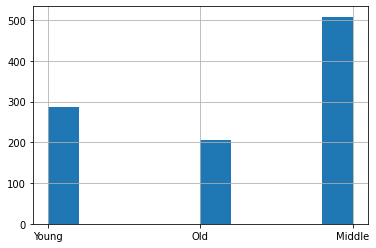

In [9]:
dataset['Age'].hist()

<AxesSubplot:>

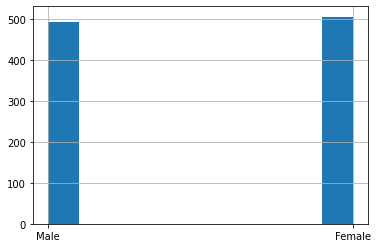

In [10]:
dataset['Gender'].hist()

<AxesSubplot:>

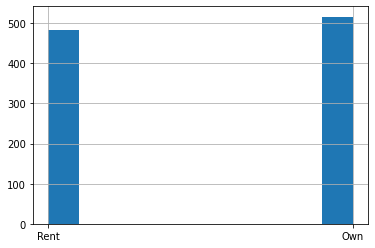

In [11]:
dataset['OwnHome'].hist()

<AxesSubplot:>

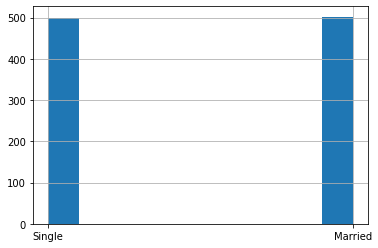

In [12]:
dataset['Married'].hist()

<AxesSubplot:>

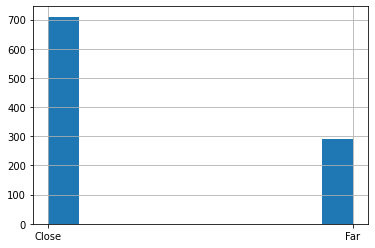

In [13]:
dataset['Location'].hist()

count      1000.000000
mean      56103.900000
std       30616.314826
min       10100.000000
25%       29975.000000
50%       53700.000000
75%       77025.000000
max      168800.000000
Name: Salary, dtype: float64


<AxesSubplot:>

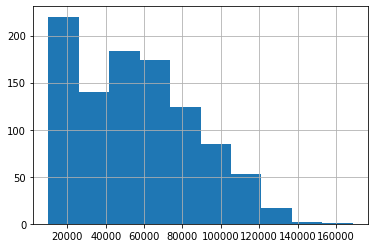

In [14]:
print(dataset['Salary'].describe())
dataset['Salary'].hist()

count    1000.00000
mean        0.93400
std         1.05107
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         3.00000
Name: Children, dtype: float64


<AxesSubplot:>

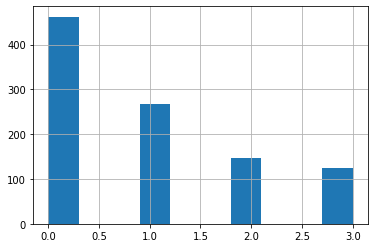

In [15]:
print(dataset['Children'].describe())
dataset['Children'].hist()

<AxesSubplot:>

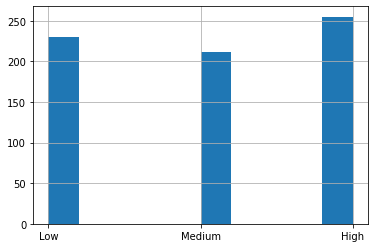

In [16]:
dataset['History'].hist()

count    1000.000000
mean       14.682000
std         6.622895
min         6.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        24.000000
Name: Catalogs, dtype: float64


<AxesSubplot:>

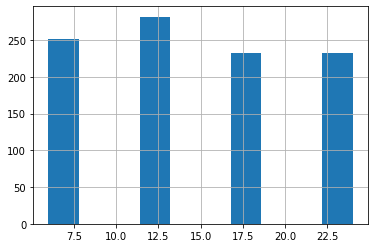

In [17]:
print(dataset['Catalogs'].describe())
dataset['Catalogs'].hist()

<AxesSubplot:>

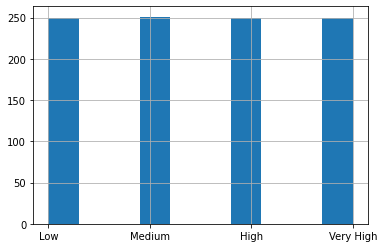

In [18]:
dataset['AmountSpent'].hist()

### Answer 1B

> From the dataset profiling task (1.a.), please **explain** the **relationship**
> between **(1)** the customer’s Age and their Salary; **(2)** the customer’s marital status and
> their salary; **(3)** the customer’s salary and their amount spent in Bee Department
> Store. Please **explain** it using **data** and **visualization**. 

#### Age <> Salary

<ErrorbarContainer object of 3 artists>

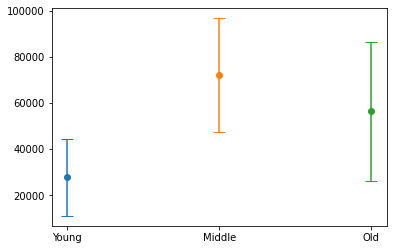

In [19]:
# Calculates the average `Salary` for every `Age`
age_group_salary = dataset.groupby('Age')
age_group_salary_young = age_group_salary.get_group('Young')
age_group_salary_middle = age_group_salary.get_group('Middle')
age_group_salary_old = age_group_salary.get_group('Old')

plt.errorbar('Young', age_group_salary_young['Salary'].mean(), yerr=age_group_salary_young['Salary'].std(), fmt='o', capsize=6, label='Young')
plt.errorbar('Middle', age_group_salary_middle['Salary'].mean(), yerr=age_group_salary_middle['Salary'].std(), fmt='o', capsize=6, label='Middle')
plt.errorbar('Old', age_group_salary_old['Salary'].mean(), yerr=age_group_salary_old['Salary'].std(), fmt='o', capsize=6, label='Old')

It seems that the trend is to have young-aged person to have a low salary (to the point of their highest matching lowest of the middle-aged person), a middle-aged person to have the highest salary, and old-aged person to have a salary between the highest and the lowest.

#### Marital Status <> Salary

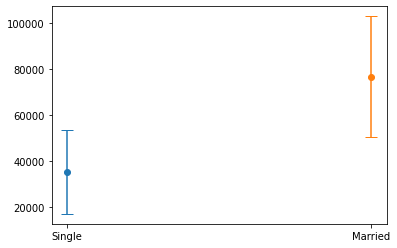

In [20]:
# Calculates the average `Salary` for every `Age`
for k in dataset['Married'].unique():
   plt.errorbar(k, dataset.loc[dataset['Married'] == k, 'Salary'].mean(), yerr=dataset.loc[dataset['Married'] == k, 'Salary'].std(), fmt='o', capsize=6, label=k)


It seems like married couples may have a larger (majority >2 times) salary than non-married person.

#### Salary <> Amount Spent

In [21]:
for k in dataset['AmountSpent'].unique():
  print("People will spend " + k + " amount of money when their salary is around " + str(dataset.loc[dataset['AmountSpent'] == k, 'Salary'].mean().round()) + " unit.")

People will spend Low amount of money when their salary is around 26510.0 unit.
People will spend Medium amount of money when their salary is around 47817.0 unit.
People will spend High amount of money when their salary is around 63405.0 unit.
People will spend Very High amount of money when their salary is around 86746.0 unit.


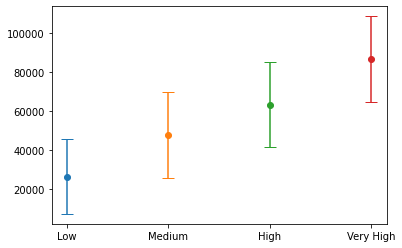

In [22]:
# Calculates the average `Salary` for every `Age`
for k in dataset['AmountSpent'].unique():
  plt.errorbar(k, dataset.loc[dataset['AmountSpent'] == k, 'Salary'].mean(), yerr=dataset.loc[dataset['AmountSpent'] == k, 'Salary'].std(), fmt='o', capsize=6, label=k)

The amount of money spent in Bee Department Store is porpotionally correlated with the amount of salary each person have.

### Answer 1C

> Perform data pre-processing and features engineering process on
> the dataset! Please explain the motivation on why do you choose such data
> processing and feature engineering techniques. Moreover, please explain the process
> and the results.

For every transformed data, I am going to put the result of it in a separate variable below

In [23]:
preprocessed_dataset = dataset.copy()

First of all, for every columns which have *category labels* in it, I am going to convert the labels into integers.

The simple explanation on why I am doing this is that our machine learning algorithm may not be able to take string labels as one of the data source. Turning labels into integers solves this.

Though, it needs to be mentioned that if we have a "binned" numerical category, it would be best for us to sort the labels such that the lowest value is the lowest integer, and the highest value being the highest integer.

In [24]:
import sklearn

for k in dataset.keys():
  if (dataset[k].dtype == 'object'):
    preprocessed_dataset[k] = sklearn.preprocessing.LabelEncoder().fit_transform(dataset[k])


In [25]:
preprocessed_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1000 non-null   int64
 1   Gender       1000 non-null   int64
 2   OwnHome      1000 non-null   int64
 3   Married      1000 non-null   int64
 4   Location     1000 non-null   int64
 5   Salary       1000 non-null   int64
 6   Children     1000 non-null   int64
 7   History      1000 non-null   int64
 8   Catalogs     1000 non-null   int64
 9   AmountSpent  1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


Next, as mentioned previously in Answer 1A, the `History` columns have empty fields in it.

In [26]:
print("There are " + str(dataset['History'].isnull().sum()) + " empty values in the `History` column:")
dataset.loc[dataset['History'].isnull()]

There are 303 empty values in the `History` column:


,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
10,Young,Male,Rent,Single,Close,11200,0,NaN,6,Low
23,Young,Female,Rent,Single,Close,14100,3,NaN,6,Low
24,Young,Female,Rent,Single,Close,11500,3,NaN,6,Low
30,Young,Female,Rent,Single,Close,13700,1,NaN,6,Low
39,Young,Male,Rent,Single,Close,19100,0,NaN,6,Low
...,...,...,...,...,...,...,...,...,...,...
974,Middle,Male,Own,Married,Close,105300,1,NaN,18,Very High
975,Middle,Male,Own,Married,Close,123800,2,NaN,18,Very High
984,Middle,Male,Own,Married,Close,96300,2,NaN,18,Very High
985,Middle,Male,Own,Married,Far,118400,2,NaN,12,Very High


Normally, `scikit`'s `LabelEncoder` has labelled the empty data as an additional label. In this case, I think that transforming the empty data into the average value of the label's integer would be helpful. 

In [27]:
# GOAL: For every non empty value in the `History` column, we replace it with the mean of the column

# Calculating the mean of the label value of `History` column for every non empty value
history_avg = sklearn.preprocessing.LabelEncoder().fit_transform(dataset['History'].dropna()).mean()

In [28]:
# Get all columns with NaN `History`
# dataset.loc[dataset['History'].isnull()]

# Replace all NaN `History` with the mean of the column
for i in dataset.loc[dataset['History'].isnull()].index:
  preprocessed_dataset.loc[i, 'History'] = history_avg


In [29]:
preprocessed_dataset['History'].unique()

array([1.        , 0.93830703, 2.        , 0.        ])

### Answer 1D

> Perform feature selection and prepare your data correctly for the
> machine learning training process. Please explain why do you choose the features and
> explain the process.

For each algorithm, I am going to use the same train and test data. The following is the preprocessed dataset being split into train and test:

In [30]:
# TRIAL
# preprocessed_dataset.drop(['Gender', 'Children'], axis=1, inplace=True)

# Test size 0.05
trainset, testset = sklearn.model_selection.train_test_split(preprocessed_dataset, test_size=0.1)

For each set, I will split the output further to X and Y axis, X being the input and Y being the expected output:

In [31]:
train_in = trainset.drop(['AmountSpent'], axis=1)
train_out = trainset['AmountSpent']

test_in = testset.drop(['AmountSpent'], axis=1)
test_out = testset['AmountSpent']

In [32]:
train_in

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
373,1,1,0,1,0,51400,0,0.938307,6
379,0,1,0,1,0,62700,2,2.000000,12
643,0,0,0,0,0,96500,1,0.000000,18
336,0,0,1,0,0,40500,2,1.000000,18
393,0,1,0,0,0,83000,2,2.000000,6
...,...,...,...,...,...,...,...,...,...
182,2,0,1,1,1,17300,1,1.000000,18
719,0,1,0,0,0,96100,0,0.000000,6
840,0,1,0,0,0,82400,3,0.938307,18
348,0,1,1,1,0,39000,0,0.938307,6


## Question 2

> Using the features selected from case number 1:

### Answer 2A

> Choose at least three machine learning algorithms of your choice to
> predict the customer amount spent at the Bee Department Store (AmountSpent).
> Please explain your choice, the training process, and the training results

Since we are essentially predicting a category (`AmountSpent`), we are going to take a look at using Linear SVC first (`sklearn.svm.LinearSVC`). If the said algorithm didn't produce the accuracy required, we are going to move to using K-Neighbors classifier(`sklearn.neighbors.KNeighborsClassifier`). The last algorithm when everything fails is to use a pipeline and use both a Support Vector Machine(`sklearn.svm.SVC`) then an ensemble classifier.

Every `scikit-learn`'s model has been stream-lined such that every algorithm is a Python class and it has `Algorithm#fit()` and `Algorithm#predict()` function in it. So, in every algorithm below, we are going to simply feed the split input data into the model by calling `Algorithm#fit()`. Once that is done, the accuracy of the said model can be measured by calling `Algorithm#predict()`, feeding the test input data, and comparing the output of that with the real output of the dataset.

All accuracy is a float value ranging from 0 (being the worst; none of the predicted value is correct) to 1 (being the best; all predicted values matches the test data). To help calculate them, `scikit-learn` has also included a helper function `sklearn.metrics.accuracy_score` that will automatically do the calculation for us.

#### LinearSVC

In [33]:
linearsvc_model = sklearn.svm.LinearSVC()
linearsvc_model.fit(train_in, train_out)

/home/angelo/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [34]:
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, linearsvc_model.predict(test_in))))

Accuracy score: 0.2


#### KNeighborsClassifier

In [35]:
kn_model = sklearn.neighbors.KNeighborsClassifier()
kn_model.fit(train_in, train_out)

KNeighborsClassifier()

In [36]:
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, kn_model.predict(test_in))))

Accuracy score: 0.54


#### SVC

In [37]:
svc_model = sklearn.svm.SVC()
svc_model.fit(train_in, train_out)

SVC()

In [38]:
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, svc_model.predict(test_in))))

Accuracy score: 0.62


### Answer 2B

> Perform hyper-parameters tuning to three machine learning
> algorithms of your choice from case number 2.a. The task is to predict the customer
> amount spent at the Bee Department Store (AmountSpent). Please explain your
> motivation on why do you choose such hyper-parameters tunning techniques.
> Moreover, please explain the process and the results.

#### LinearSVC

Without any hyperparams tuning, the LinearSVC model has a really bad accuracy score (about 25% got right).

The following are the hyperparams that I have tuned:
* `dual` is set to `False` since we have more samples than features
* `penalty` is set to `'l1'` because we want to minimize the L1 norm of the coefficients (the result of which is sparser coefficient)

In [39]:
# `penalty` is set to 'l1' because we want to minimize the L1 norm of the coefficients (sparser coefficient)
# `dual` is set to false since we have more samples than features
linearsvc_model = sklearn.svm.LinearSVC(penalty='l1', dual=False, verbose=1)
linearsvc_model.fit(train_in, train_out)

[LibLinear].........
optimization finished, #iter = 98
Objective value = 602.589095
#nonzeros/#features = 10/10
...................
optimization finished, #iter = 198
Objective value = 261.416876
#nonzeros/#features = 10/10
...........
optimization finished, #iter = 114
Objective value = 566.063359
#nonzeros/#features = 10/10
..............
optimization finished, #iter = 146
Objective value = 247.624447
#nonzeros/#features = 10/10


LinearSVC(dual=False, penalty='l1', verbose=1)

In [40]:
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, linearsvc_model.predict(test_in))))

Accuracy score: 0.65


#### K-Neighbors Classifier

The defaults for K-Neighbors classifier has a decent accuracy already (0.58). Though, we may tune the hyper-parameters to min-max the output of the model

* `n_neighbors` is set to `25`
* `p` (Power parameter for Minkowski's metric) is set to `1.5`
* `weights` is set to `'uniform'`

In [41]:
kn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=25, p=1.5, weights='uniform')
kn_model.fit(train_in, train_out)

KNeighborsClassifier(n_neighbors=25, p=1.5)

In [42]:
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, kn_model.predict(test_in))))

Accuracy score: 0.57


#### SVC

In [43]:
svc_model = sklearn.svm.SVC(kernel='rbf', C=0.6, gamma=0.0000000001, verbose=1)
svc_model.fit(train_in, train_out)
print("Accuracy score: " + str(sklearn.metrics.accuracy_score(test_out, svc_model.predict(test_in))))

[LibSVM]*
optimization finished, #iter = 116
obj = -107.885436, rho = 0.797133
nSV = 198, nBSV = 196
*
optimization finished, #iter = 252
obj = -210.450792, rho = 0.900949
nSV = 362, nBSV = 360
*
optimization finished, #iter = 194
obj = -180.275697, rho = -0.988208
nSV = 312, nBSV = 310
*
optimization finished, #iter = 209
obj = -170.730932, rho = -1.196735
nSV = 303, nBSV = 300
*
optimization finished, #iter = 68
obj = -62.982462, rho = -0.603557
nSV = 116, nBSV = 116
*
optimization finished, #iter = 135
obj = -128.537436, rho = -0.993675
nSV = 230, nBSV = 228
Total nSV = 753
Accuracy score: 0.61


### Answer 2C

> Evaluate all the models trained with the machine learning algorithms
> from task no 2.b. Explain comprehensively: (1) the meaning of the results, (2) the
> future work direction to improve the model (i.e. what should we do to improve the
> results).

The following are the final accuracy after hyperparameter tweaking:
* `LinearSVC`: 67%
* `KNeighborsClassifier`: 53%
* `SVC`: 59%

With this, it is clear that **LinearSVC** provides the most accurate prediction after optimization with this dataset. 

In the future, if we are to improve the model, we would need to gather more data for our training, optimally increasing the count by tenfolds (excluding test data). To add, we would need to spend more time fine-tuning and analyzing the model's behavior.

## Question 3

> Using the dataset from case number 1, Bee Department Store is also planning to build a
> customer clustering model, so they can provide the best marketing strategy for each
> customer cluster. As their Machine Learning Engineer, you are required to:

### Answer 3A

> Prepare your data for the clustering task. Perform data preprocessing and features engineering process on the dataset specifically for clustering
> task! Please explain your motivation on why do you choose such data processing and
> feature engineering techniques. Moreover, please explain the process and the results.

In [44]:
dataset

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Young,Male,Rent,Single,Close,15000,3,Low,6,Low
1,Young,Male,Rent,Single,Close,13000,3,Low,6,Low
2,Young,Female,Rent,Single,Close,14600,3,Low,6,Low
3,Young,Female,Rent,Single,Close,17900,3,Low,6,Low
4,Old,Female,Own,Single,Close,12700,2,Low,6,Low
...,...,...,...,...,...,...,...,...,...,...
995,Middle,Female,Own,Married,Far,99200,0,High,24,Very High
996,Old,Female,Own,Married,Far,110000,0,High,24,Very High
997,Middle,Female,Rent,Married,Far,120800,1,High,24,Very High
998,Middle,Male,Own,Married,Far,123000,1,High,24,Very High


For this task, I am going to try and predict the market segment of each users.

For clustering, we are going to try and use KMeans (`sklearn.cluster.KMeans`) and SpectralClustering (`sklearn.cluster.SpectralClustering`)

We for the data, we are going to use `Salary`, `Catalogs` and `AmountSpent` to feed the model. Specifically, we are going to cluster the `AmountSpent`

In [45]:
# From `dataset`, select `Salary`, `Catalogs` and `AmountSpent` column
clustering_data = dataset[['Salary', 'Catalogs', 'AmountSpent']]

# Convert AmountSpent to labels
clustering_data['AmountSpent'] = clustering_data['AmountSpent'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})

/tmp/ipykernel_97355/3583236570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['AmountSpent'] = clustering_data['AmountSpent'].map({'Low': 0, 'Medium': 1, 'High': 2, 'Very High': 3})


In [64]:
clustering_data

,Salary,Catalogs,AmountSpent
0,15000,6,0
1,13000,6,0
2,14600,6,0
3,17900,6,0
4,12700,6,0
...,...,...,...
995,99200,24,3
996,110000,24,3
997,120800,24,3
998,123000,24,3


### Answer 3B

> Choose at least two clustering algorithms of your choice to cluster
> the customer. Please explain your choice, the training process, and the training
> results. Moreover, perform hyper-parameters tuning to the best clustering
> algorithms.

#### KMeans

In [63]:
kmeans_model = sklearn.cluster.KMeans(n_clusters=4)
kmeans_model.fit(clustering_data)

KMeans(n_clusters=4)

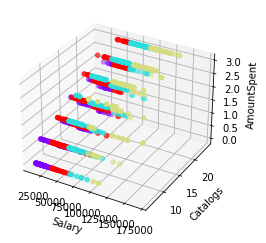

In [54]:
# Show 3D scatter of the KMeans cluster
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(clustering_data['Salary'], clustering_data['Catalogs'], clustering_data['AmountSpent'], c=kmeans_model.labels_, cmap='rainbow')
ax.set_xlabel('Salary')
ax.set_ylabel('Catalogs')
ax.set_zlabel('AmountSpent')
plt.show()

#### SpectralClustering

In [61]:
spectralclustering_model = sklearn.cluster.SpectralClustering(n_clusters=4, eigen_solver='arpack', affinity='nearest_neighbors')
spectralclustering_model.fit(clustering_data)

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=4)

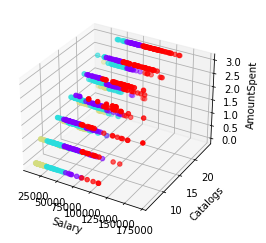

In [62]:
# Show 3D scatter of the KMeans cluster
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(clustering_data['Salary'], clustering_data['Catalogs'], clustering_data['AmountSpent'], c=spectralclustering_model.labels_, cmap='rainbow')
ax.set_xlabel('Salary')
ax.set_ylabel('Catalogs')
ax.set_zlabel('AmountSpent')
plt.show()

### Answer 3C

> Evaluate all the models trained with the machine learning algorithms
> from task no 2.b. Explain comprehensively: (1) the meaning of the results, (2) the
> future work direction to improve the model (i.e. what should we do to improve the
> results).

As illustrated in the previous answer, after tening the hyperparameters of each algorithm, the graph has a similar in answer.

Similar to the previous question, to improve the model, we would need to gather more data for our training, optimally increasing the count by tenfolds (excluding test data). To add, we would need to spend more time fine-tuning and analyzing the model's behavior.